In [38]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


In [39]:
data=pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
data.head()
data=data.iloc[:,:-2]

data["Attrition_Flag"]=np.where(data["Attrition_Flag"]=="Existing Customer","No","Yes")
data=data.rename(columns={"Attrition_Flag":"Churn"})
data["Churn"]=data["Churn"].astype(str)
data=data.drop("CLIENTNUM",axis=1)

In [40]:
data

,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,No,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,No,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,No,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,No,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,No,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,No,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Yes,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Yes,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Yes,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [41]:
data[data["Marital_Status"]=="Unknown"]

,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,No,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,No,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,No,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,No,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,No,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,No,47,M,3,High School,Unknown,$80K - $120K,Silver,40,5,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,No,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,No,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,3,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,Yes,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [42]:
data.isna().sum()

Churn                       0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# **Visualization**

In [43]:


def perc_plot(column,title):
    matrix=pd.crosstab(data["Churn"],data[column])
    percentage_table = matrix.apply(lambda x: x / x.sum() * 100, axis=0)
    tidy_df = percentage_table.reset_index().melt(id_vars='Churn', var_name=column, value_name='percentage')
    sorted_tidy=tidy_df.sort_values("percentage",ascending=False)
    
    print(sorted_tidy)
    plt.figure(figsize=(8, 5))
    ax=sns.barplot(data=sorted_tidy,x=column,y="percentage",hue="Churn")
    plt.ylim(0,100)

    # Add percentage labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=8)
    plt.title(title)
    plt.show()


def box_plot(column,title):
    sns.boxplot(x="Churn",y=column,data=data)
    plt.title(title)
    plt.show()

def dist_plot(column,title):
    sns.displot(x=column,data=data,col="Churn")
    plt.title(title)
    plt.show()

  Churn Gender  percentage
2    No      M   85.384777
0    No      F   82.642777
1   Yes      F   17.357223
3   Yes      M   14.615223


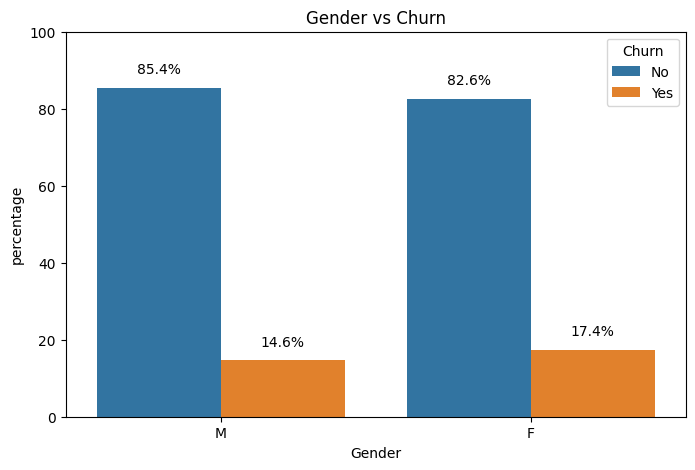

In [44]:
perc_plot("Gender","Gender vs Churn")

   Churn Education_Level  percentage
6     No     High School   84.798808
0     No         College   84.797631
4     No        Graduate   84.430946
10    No      Uneducated   84.061870
12    No         Unknown   83.146807
8     No   Post-Graduate   82.170543
2     No       Doctorate   78.935698
3    Yes       Doctorate   21.064302
9    Yes   Post-Graduate   17.829457
13   Yes         Unknown   16.853193
11   Yes      Uneducated   15.938130
5    Yes        Graduate   15.569054
1    Yes         College   15.202369
7    Yes     High School   15.201192


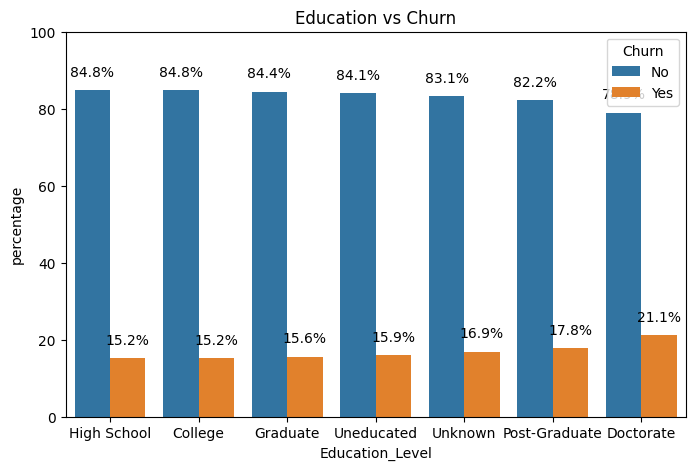

In [45]:
perc_plot("Education_Level","Education vs Churn")

  Churn Marital_Status  percentage
2    No        Married   84.873053
0    No       Divorced   83.823529
4    No         Single   83.058585
6    No        Unknown   82.777036
7   Yes        Unknown   17.222964
5   Yes         Single   16.941415
1   Yes       Divorced   16.176471
3   Yes        Married   15.126947


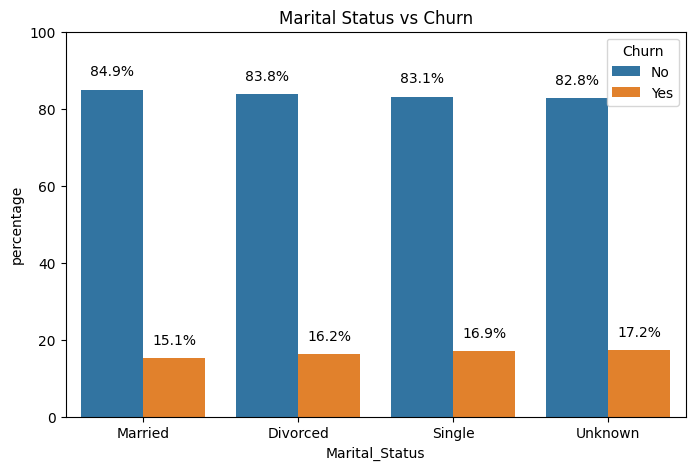

In [46]:
perc_plot("Marital_Status","Marital Status vs Churn")

   Churn Income_Category  percentage
4     No     $60K - $80K   86.519258
2     No     $40K - $60K   84.860335
6     No    $80K - $120K   84.234528
10    No         Unknown   83.183453
8     No  Less than $40K   82.813816
0     No         $120K +   82.668501
1    Yes         $120K +   17.331499
9    Yes  Less than $40K   17.186184
11   Yes         Unknown   16.816547
7    Yes    $80K - $120K   15.765472
3    Yes     $40K - $60K   15.139665
5    Yes     $60K - $80K   13.480742


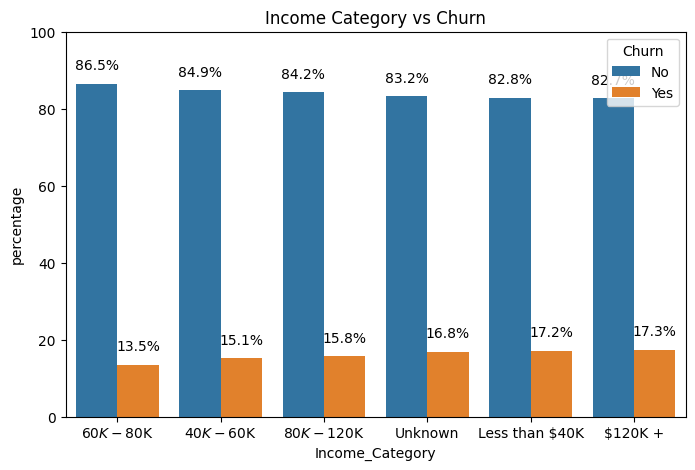

In [47]:
perc_plot("Income_Category","Income Category vs Churn")

  Churn Card_Category  percentage
6    No        Silver   85.225225
0    No          Blue   83.902077
2    No          Gold   81.896552
4    No      Platinum   75.000000
5   Yes      Platinum   25.000000
3   Yes          Gold   18.103448
1   Yes          Blue   16.097923
7   Yes        Silver   14.774775


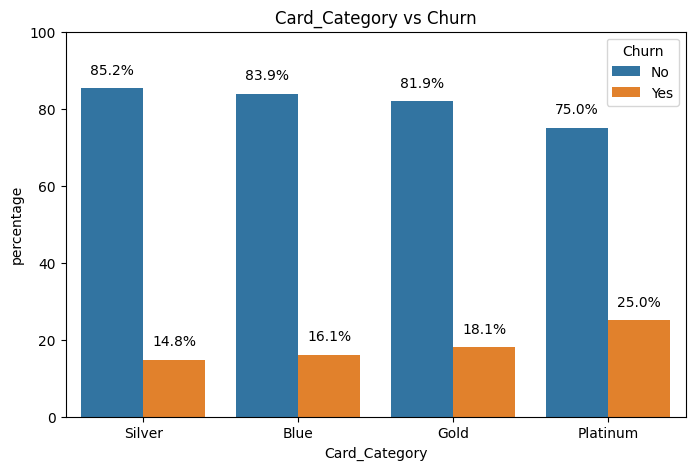

In [48]:
perc_plot("Card_Category","Card_Category vs Churn")

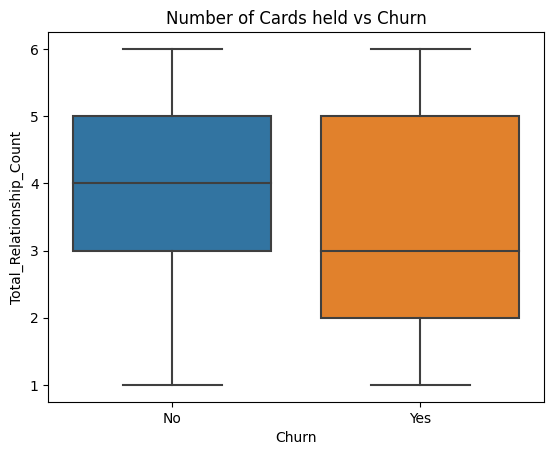

In [49]:
box_plot("Total_Relationship_Count","Number of Cards held vs Churn")

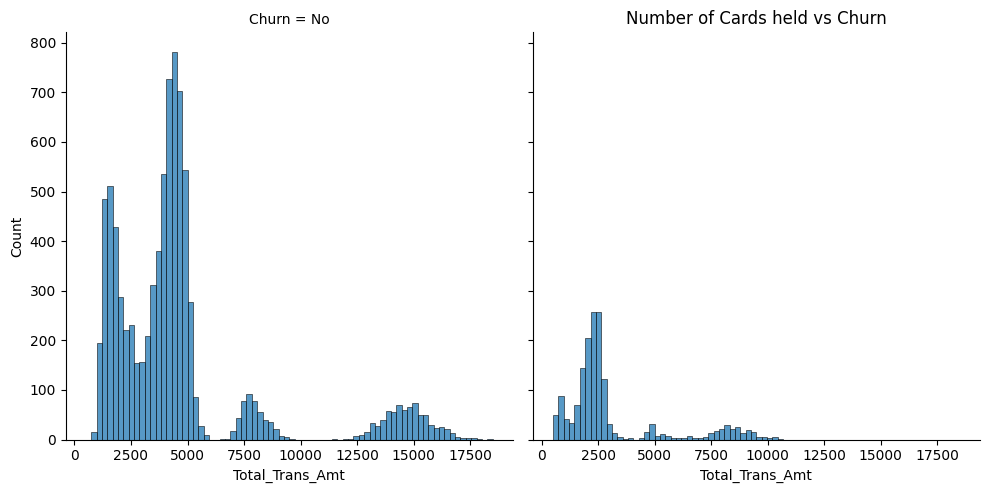

In [50]:
dist_plot("Total_Trans_Amt","Number of Cards held vs Churn")

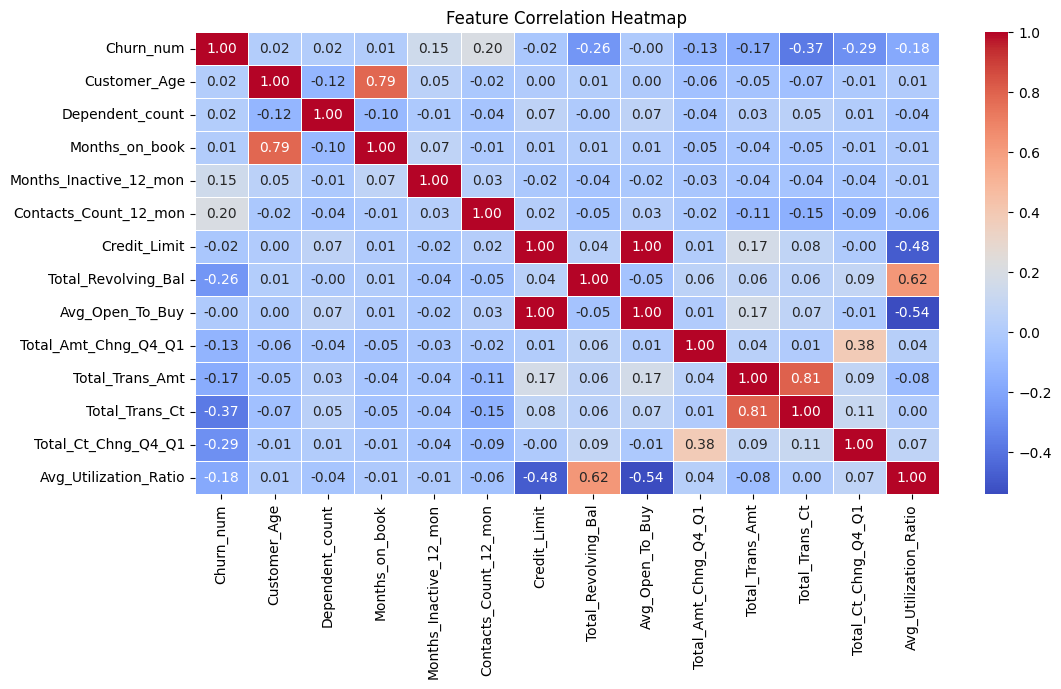

In [51]:
#Heatmap

data["Churn_num"]=np.where(data["Churn"]=="No",0,1)
heat=data.loc[:,["Churn_num","Customer_Age","Dependent_count","Months_on_book","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]]


plt.figure(figsize=(12,6))
sns.heatmap(heat.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
data=data.drop("Churn_num",axis=1)

# **Random Forest**

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == "object":
        data[column] = le.fit_transform(data[column])
        print(f"Column :{column}, Unique Values : {data[column].unique()}")

Column :Churn, Unique Values : [0 1]
Column :Gender, Unique Values : [1 0]
Column :Education_Level, Unique Values : [3 2 5 6 0 4 1]
Column :Marital_Status, Unique Values : [1 2 3 0]
Column :Income_Category, Unique Values : [2 4 3 1 0 5]
Column :Card_Category, Unique Values : [0 1 3 2]


In [53]:
data

,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [54]:

x=data.drop("Churn",axis=1)
y=data["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)


In [55]:
standard_scaler = StandardScaler()
standard_x_train = standard_scaler.fit_transform(x_train)
standard_x_test = standard_scaler.transform(x_test)

from sklearn.model_selection import cross_val_score, KFold 
kf = KFold(n_splits=6, shuffle=True, random_state=42) 
rf = RandomForestClassifier(n_estimators=100,random_state=42) 
cv_results = cross_val_score(rf, x, y, cv=kf)

print(np.mean(cv_results), np.std(cv_results)) 

In [56]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(standard_x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = rf_model.predict(standard_x_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9552

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.92      0.80      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.96      0.95      3039



# **Naives Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(standard_x_train, y_train)

GaussianNB()

In [59]:
y_pred_nb = nb_model.predict(standard_x_test)

In [60]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8809

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2551
           1       0.63      0.62      0.63       488

    accuracy                           0.88      3039
   macro avg       0.78      0.78      0.78      3039
weighted avg       0.88      0.88      0.88      3039



# **K Nearest Neighbors**

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
steps = [ 
         ('knn', KNeighborsClassifier())] 
pipeline = Pipeline(steps)  
parameters = {"knn__n_neighbors": np.arange(1, 50)}  
 
cv = GridSearchCV(pipeline, param_grid=parameters)  
cv.fit(x_train, y_train)  
y_pred = cv.predict(x_test)


 print(cv.best_score_) 

print(cv.best_params_) 

In [61]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(standard_x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
y_pred_knn=knn.predict(standard_x_test)
accuracy_knn=accuracy_score(y_test,y_pred)


In [63]:
print(f"K Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print("\nK Nearest Neighbors Report:\n", classification_report(y_test, y_pred_knn))

K Nearest Neighbors Accuracy: 0.9552

K Nearest Neighbors Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2551
           1       0.84      0.41      0.55       488

    accuracy                           0.89      3039
   macro avg       0.87      0.70      0.74      3039
weighted avg       0.89      0.89      0.88      3039



In [64]:
train_accuracies = {} 
test_accuracies = {} 
neighbors = np.arange(1, 26) 
for neighbor in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=neighbor) 
    knn.fit(standard_x_train, y_train) 
    train_accuracies[neighbor] = knn.score(standard_x_train, y_train) 
    test_accuracies[neighbor] = knn.score(standard_x_test, y_test)

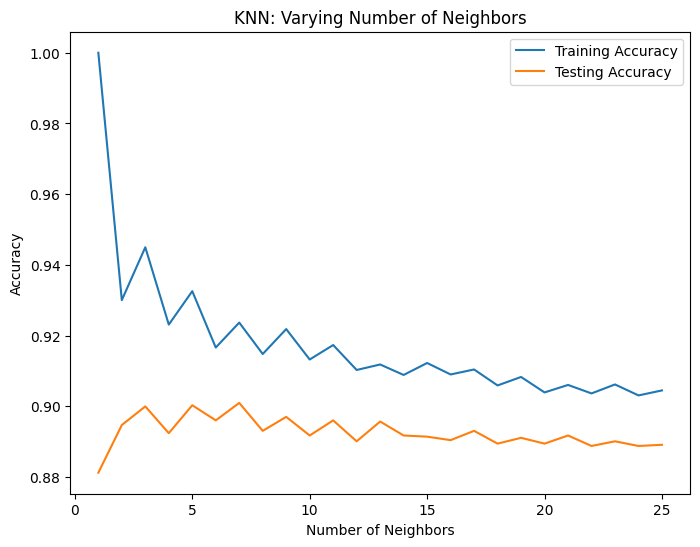

In [65]:
plt.figure(figsize=(8, 6)) 
plt.title("KNN: Varying Number of Neighbors") 
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy") 
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy") 
plt.legend() 
plt.xlabel("Number of Neighbors") 
plt.ylabel("Accuracy") 
plt.show() 

# **AdaBoost**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=10) 
ada_boost = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
ada_boost.fit(standard_x_train, y_train)


y_pred = ada_boost.predict(standard_x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9605


# **ANN Model**

In [67]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.initializers import HeUniform


# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(x_train)
scaler_X_test = scaler.transform(x_test)

In [69]:
from keras.utils import to_categorical

y_train =to_categorical(y_train,2)
y_test = to_categorical(y_test , 2)

In [70]:
from keras.regularizers import l2


ann_model = Sequential([
    Dense(512, activation="relu", kernel_initializer="he_uniform", 
          kernel_regularizer=l2(0.01), input_dim=x_train.shape[1]),
          Dropout(0.2),
          BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer="he_uniform",
          kernel_regularizer=l2(0.01)),
    Dense(128, activation="relu", kernel_initializer="he_uniform",
          kernel_regularizer=l2(0.01)),
                    Dropout(0.2),
          BatchNormalization(),
    Dense(2, activation="softmax")
])

In [71]:
ann_model.compile(optimizer=Adam(learning_rate=0.0001) , loss="binary_crossentropy" , metrics=["accuracy"])

In [72]:
fit = ann_model.fit(scaler_X_train , y_train , epochs=100 , batch_size=128 , validation_data=(scaler_X_test, y_test ) , validation_split=0.2 )

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5680 - loss: 18.7308 - val_accuracy: 0.8078 - val_loss: 17.8920
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6659 - loss: 17.7809 - val_accuracy: 0.8411 - val_loss: 17.0404
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6991 - loss: 16.9221 - val_accuracy: 0.8555 - val_loss: 16.2279
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7447 - loss: 16.1076 - val_accuracy: 0.8592 - val_loss: 15.4612
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7652 - loss: 15.3527 - val_accuracy: 0.8615 - val_loss: 14.7347
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7959 - loss: 14.6267 - val_accuracy: 0.8710 - val_loss: 14.0440
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8120 - loss: 13.9465 - val_accuracy: 0.8756 - val_loss: 13.3951
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8322 - loss: 13.2911 - v

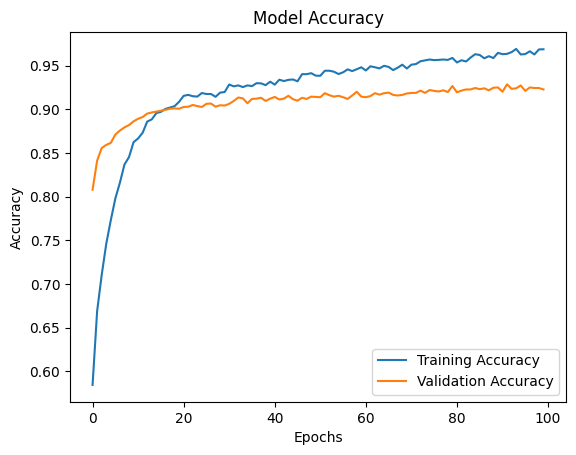

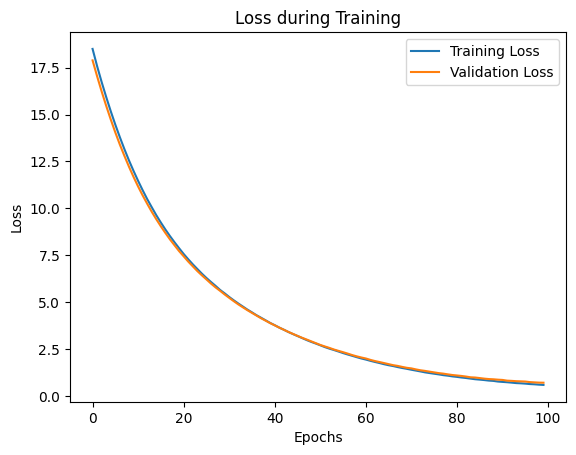

In [73]:
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')  # Corrected this line
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')  # Corrected this line
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
pred = ann_model.predict(scaler_X_test)

y_class = y_test.argmax(axis=1)
predict = pred.argmax(axis=1)

print(classification_report(y_class, predict))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2551
           1       0.78      0.72      0.75       488

    accuracy                           0.92      3039
   macro avg       0.87      0.84      0.85      3039
weighted avg       0.92      0.92      0.92      3039

